# CREDIT-CARD FRAUD PREDICTION REPORT

# Name:Bharath Yuvaraj

# Registration Number: 2316529

# Course ID: MA336

# Problem Statment


In today's digital world, credit cards have become an integral part of our financial transactions, offering convenience and flexibility. However, the internet is the reason for an increased rate of credit card fraud transactions but the fraud has increased not in online shopping and electronic payments but also offline transactions. Having a credit card means that we can borrow the funds[1]. The funds can be used for any of the purposes. When coming to the issuance of the card, the condition involved is that the cardholder will pay back the original amount they borrowed along with the additional charges they agreed to pay. Credit card fraud occurs when unauthorized transactions are made using stolen or counterfeit credit card information. It encompasses various fraudulent activities, including unauthorized purchases, identity theft, and account takeover.Credit card fraud poses significant challenges to both consumers and financial institutions. For consumers, it can result in financial losses, damage to credit scores, and personal stress due to the hassle of resolving fraudulent charges.
Machine learning is a natural choice for large service providers processing millions of transactions daily. Moreover, many people hardly run their business successfully without ML or deep learning solutions. If they did, they'd become easy prey for all sorts of scammers. Machine learning tools have higher precision and return more relevant results as they consider multiple additional factors. This is because ML technologies can consider many more data points, including the tiniest details of behavior patterns associated with a particular account.
By doing this project on simulated credit card dataset information, containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.I have impelmented five supervised machine learning models like logistics regression model,Random forest model,Decission Tree model,XGBoost Classfier model and Neural Network model to predict weather fradulant acivity is performed or not.
Data-source:https://www.kaggle.com/code/sivarajsingh/credit-card-fraud-detection/input

# Importing All Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split # train-test split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc # classification metrics

from sklearn.model_selection import GridSearchCV # grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # randomized search cross validation

# supervised learning algorithms
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from xgboost import XGBClassifier # XGBClassifier
from sklearn.linear_model import LogisticRegression #LogisticRegression
from sklearn.neural_network import MLPClassifier # MLPClassifier

#Neural Newtork model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the Dataset

In [2]:
# loading data
data_train = pd.read_csv("fraudTrain.csv")
data_test = pd.read_csv("fraudTest.csv")
print(data_train.shape,data_test.shape)
data_train.head(10)
data_test.head(10)

(1296675, 23) (555719, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


The above dataset is divided into two sets one set is train_dataset and test_dataset where the number of rows and columns in train_dataset is around (1296675, 23),test_dataset is around (555719, 23) consist of different column of discription and feature that are very important to work in this dataset and they are:
trans_date_trans_time: date and time of the transaction
cc_num: credit card number of customer
merchant: customer is paying to which merchant(like Amazon, Walmart)

Attribute documentation:
amt: the amount of transaction
first: first name of customer
last: last anme of customer
gender: gender of the customer
street, city, state: address of the customer
zip: zip code of the transaction
lat: latitude of the customer
long: longitude of customer
city_pop: population of the city he is living
job: job of cus
dob: date of birth of the customer
trans_num: unique transaction number for each and every transaction
unix_time: time of the transaction in Unix( generally not used in our analysis as it is unique mostly)
merch_lat: merchant lattitude
merch_long: merchant longitude
is_fraud: whether transaction is fraud or no (1- fraud, 0- not fraud)

In [3]:
# combining train and test datasets
df_Full_dataset = pd.concat([pd.read_csv('fraudTrain.csv'),pd.read_csv('fraudTest.csv')], ignore_index=True)
df_Full_dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


After checking both train and test dataset they had simliar number of columns that is 23,so i taught to concate both train and test togther and form a single dataset and name it as (df_Full_dataset).

# Data Cleaning

In [4]:
#Dataset descriptions
df_Full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

As can be seen from the results above,the datatypes of each columns are metioned where out of 23 columns 11 columns are numeric and and 12 columns are categorical columns

In [5]:
df_Full_dataset.duplicated().sum()

0

There is no any duplicate values in the dataset

In [6]:
#check for missing values
df_Full_dataset.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

As can be seen from the results above, the dataset contains 23 columns and there is no missing data or null value present in the dataset.

# Exploratory Data Analysis

1.Category vs Fraud

First,we examine in which spending categories fraud happens most predominantly. To do this, we first calculate the category with the unique value count and saw what is count for top and least categorys.The second we check with Seaborn library which allows you to visualize the relationship between one categorical variable (category in this case) and one numerical variable (amt), with the added dimension of color (hue) representing another categorical variable (is_fraud).However, the fraud is more in categorical column as this will help in predicting more model build with good results.

In [7]:
#Checking all the categorical column
df_Full_dataset['category'].astype('category').value_counts()

category
gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: count, dtype: int64

The above result tell that how many times each unique category appears in the 'category' column of the DataFrame, after converting it to the categorical data type. This can be useful for understanding the distribution of categories in the column and identifying any potential data quality issues or patterns.The top category is gas_transport with the value count if 188029 and with least count is travel.  

D:\Bharath_Anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Bharath_Anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


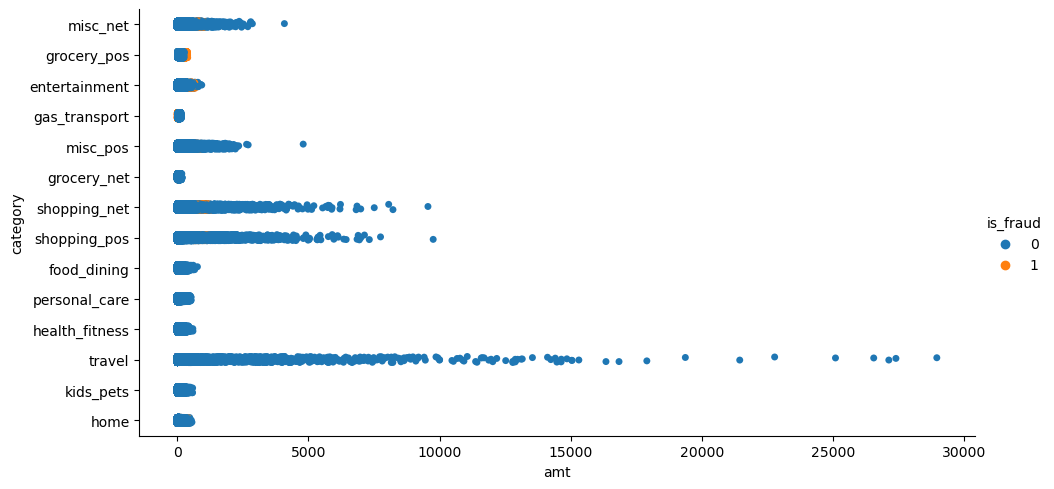

In [8]:
#plot to check the for which category the faurd is more
sns.catplot(x='amt',y='category',data=df_Full_dataset,hue='is_fraud',aspect=2)

As can be seen from the results above, Some categories indeed see more fraud than others! Fraud tends to happen more often in 'Shopping_net', 'Grocery_pos', 'misc_net',entertainmentand gas_transport while 'home' and 'kids_pets' among others tend to see more normal transactions than fraudulent ones.

2. Gender vs Fraud

Second, we'll look at whether one gender is more vulnerable to fraud than the other.I checked with three steps one checked with unique count of values of female and Male.The next step was in pie chart to plot a grap and check with the percntage of genders distributed and finial step is checking of genders with fraud column whether which gender is more towords the fradulatent activitys.

In [9]:
#Checking all the categorical column
df_Full_dataset['gender'].astype('category').value_counts()

gender
F    1014749
M     837645
Name: count, dtype: int64

from each unique category appears in the 'gender' column of the DataFrame, after converting it to the categorical data type. This can be useful for understanding the distribution of gender in the column and identifying any potential data quality issues or patterns.The number of each value of genders where Female is having value count of 1014749 and male is around 837645.

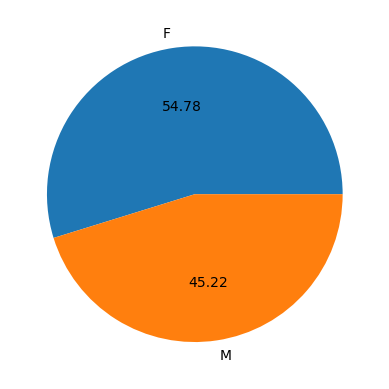

In [10]:
#Showing plot for the gender
plt.pie(df_Full_dataset["gender"].value_counts(), labels=df_Full_dataset["gender"].unique(), autopct="%.2f")
plt.show()

With each segment representing a gender category and the size of each segment proportionate to the count of that gender category in the dataset, the resulting pie chart visually shows the distribution of genders in the dataset. On the matching section of the pie chart, the proportion of each gender category is also shown 54.78% of the percentage is female, and 45.22% is male.


D:\Bharath_Anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


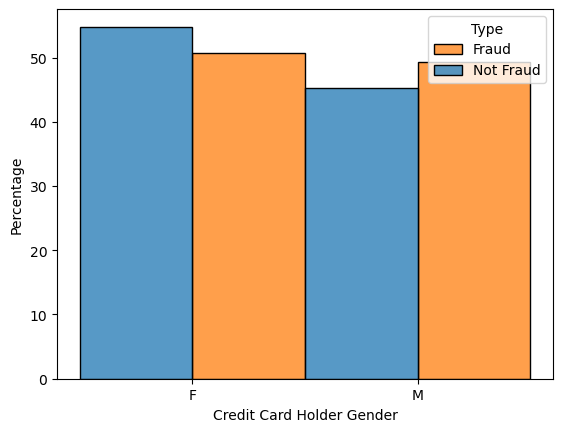

In [11]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=df_Full_dataset, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

By looking into the bar plot  we do not see a clear difference between both genders. Data seem to suggest that females and males are almost equally susceptible (50%) to transaction fraud.

3.State vs Fraud

You can see how fraudulent and non-fraudulent transactions are distributed around the states in this visualization, which gives you an idea of how common fraud is in each one.

D:\Bharath_Anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


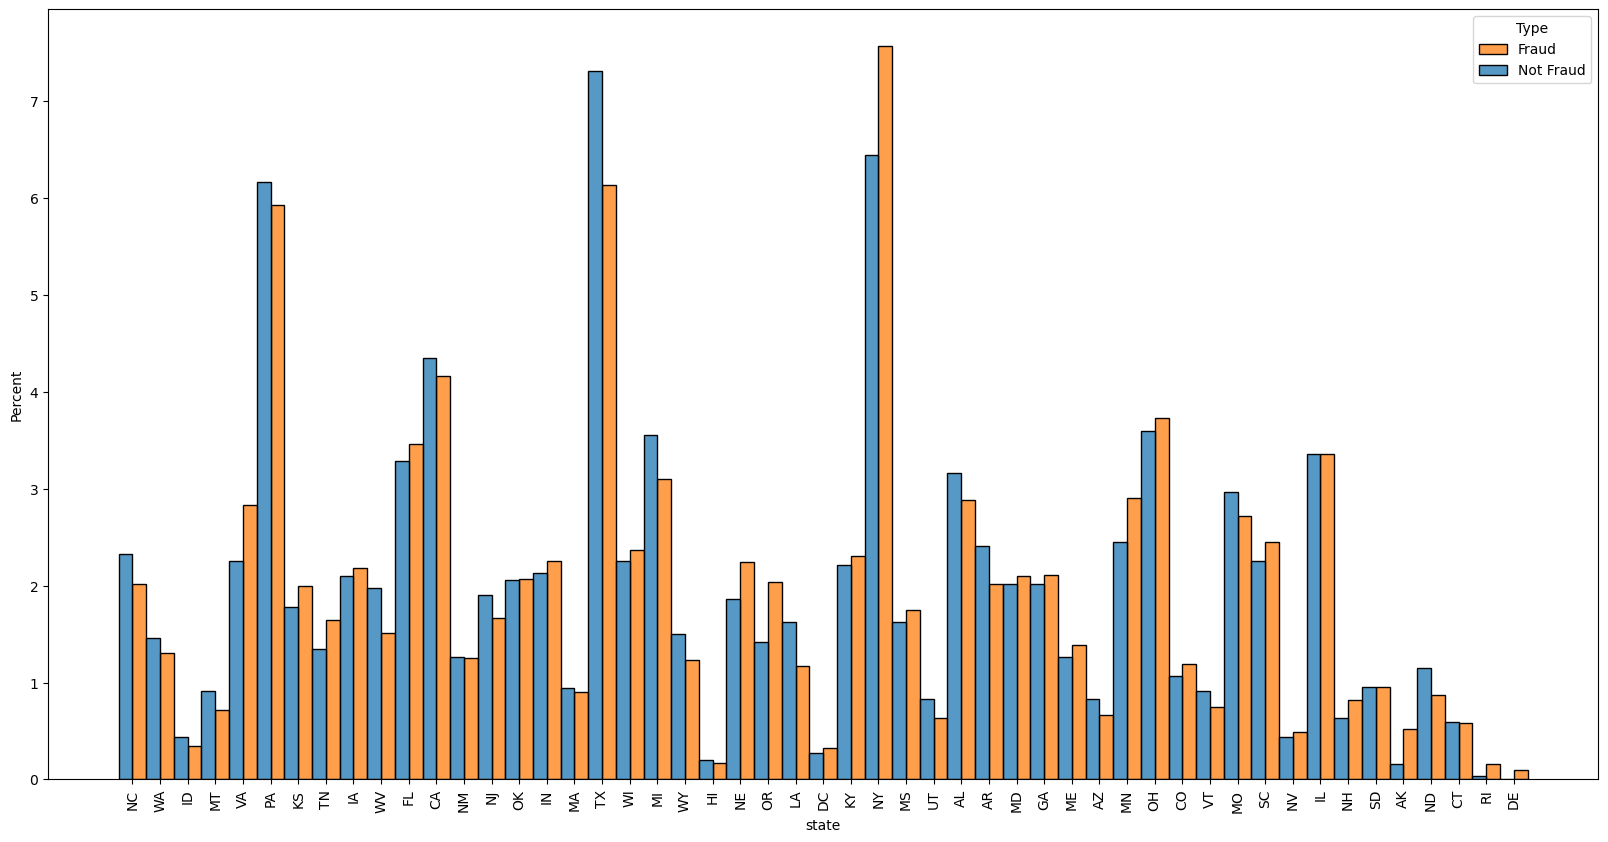

In [12]:
# State vs fraud
f, ax = plt.subplots(figsize=(20, 10))
ax=sns.histplot(x='state',data=df_Full_dataset, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
plt.xticks(rotation=90)
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show();



From the plot above,we can see the top three fraud in state the highest fraud happening place NY and second higest is Tx and third higest is VA among others have a higher percentage of fraudulent transactions than normal ones. However, it should be pointed out that the percentage differences in those states are not very significant but a correlation does exist.

4.job vs Fraud

In this code will create a pivot table where each row represents a job type, and the columns represent the count of fraudulent and non-fraudulent transactions for each job type. The table is sorted by the total number of transactions (fraudulent + non-fraudulent).By checking this table we can compare the distribution of fraudulent and non-fraudulent transactions across different job types.

In [15]:
# Create a pivot table to calculate the count of fraudulent and non-fraudulent transactions for each job type
job_fraud_counts = df_Full_dataset.pivot_table(index='job', columns='is_fraud', aggfunc='size', fill_value=0)

# Rename columns for clarity
job_fraud_counts.columns = ['Non-Fraudulent', 'Fraudulent']

# Sort the pivot table by the total number of transactions (sum of fraudulent and non-fraudulent)
job_fraud_counts['Total'] = job_fraud_counts.sum(axis=1)
job_fraud_counts = job_fraud_counts.sort_values(by='Total', ascending=False)

# Drop the 'Total' column after sorting
job_fraud_counts.drop(columns='Total', inplace=True)

# Display the pivot table sorted by the count of fraudulent transactions in descending order
print("Job sectors with counts of fraudulent and non-fraudulent transactions:")
print(job_fraud_counts)


Job sectors with counts of fraudulent and non-fraudulent transactions:
                            Non-Fraudulent  Fraudulent
job                                                   
Film/video editor                    13846          52
Exhibition designer                  13116          51
Surveyor, land/geomatics             12386          50
Naval architect                      12368          66
Materials engineer                   11649          62
...                                    ...         ...
Engineer, water                          0           8
Veterinary surgeon                       0           8
Warehouse manager                        0           7
Ship broker                              0           7
Contracting civil engineer               0           7

[497 rows x 2 columns]


The table displays,the counts of fraudulent and non-fraudulent transactions for various job sector,ranging from highest to lowest, we can see the top five job sectors where were majority of Fraudulent are First one is Quantity surveyor the number of Fraudulent is 69 , the second is Naval architect the number of Fraudulent is 66 and third is Materials engineer the number of Fraudulent is 62 and the least happing is Engineer, communications the number of Fraudulent is 0.

5.Amount vs Fraud

we tried a box plot where each box represents the distribution of transaction amount for fraudulent and non-fraudulent transactions. The x-axis represents the transaction type ('Not Fraud' and 'Fraud'), and the y-axis represents the transaction amount in USD. Box plots are useful for visualizing the central tendency, spread, and skewness of the distribution of transaction amounts for each transaction type.

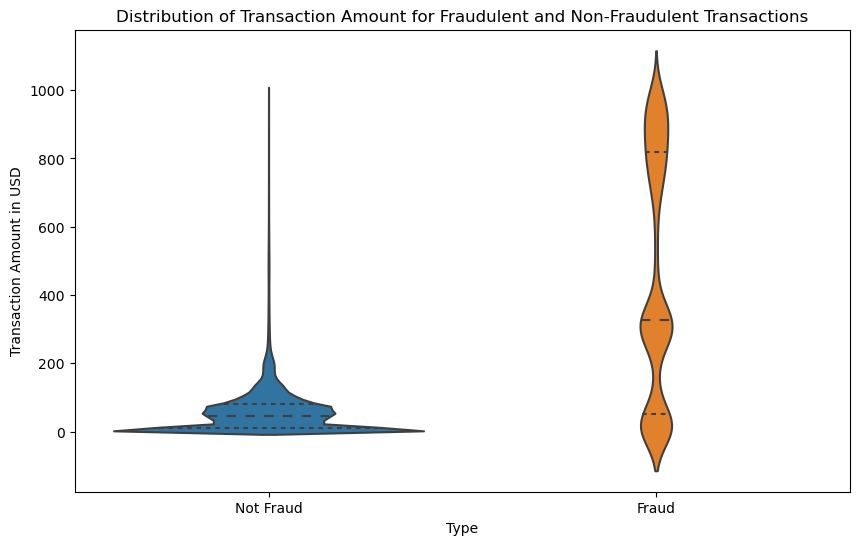

In [16]:
# Create a violin plot to visualize the distribution of transaction amount for fraudulent and non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.violinplot(x='is_fraud', y='amt', data=df_Full_dataset[df_Full_dataset.amt <= 1000], inner='quartile')
plt.xlabel('Type')
plt.ylabel('Transaction Amount in USD')
plt.title('Distribution of Transaction Amount for Fraudulent and Non-Fraudulent Transactions')
plt.xticks(ticks=[0, 1], labels=['Not Fraud', 'Fraud'])
plt.show()

The right side shows fraudulent transactions. The shape is more elongated and straight, and there are two bulges, suggesting that two different amounts are more common for fraudulent transactions. Like the non-fraudulent distribution, it also has dotted lines representing quartiles and a median, which appears to be higher compared to non-fraudulent transactions.so there is fraud happing more in this amount column more.

# Feature Engineering

In [17]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df_Full_dataset[["Unnamed: 0","category","gender", "city", "state", "job", "dob",'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'zip', 'lat', 'long', 'trans_num', 'unix_time', 'merch_lat', 'merch_long']])
df_Full_dataset[["Unnamed: 0","category","gender", "city", "state", "job", "dob",'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'zip', 'lat', 'long', 'trans_num', 'unix_time', 'merch_lat', 'merch_long']] = enc.transform(df_Full_dataset[["Unnamed: 0","category","gender", "city", "state", "job", "dob",'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'zip', 'lat', 'long', 'trans_num', 'unix_time', 'merch_lat', 'merch_long']])

So after doing all the EDA wanted to check all the columns whether there is any direct relationship btween the the target coulmn (is_fraud).so i did Ordinal encoding where this method used to convert categorical variables into numerical representations.After performing ordinal encoding for all columns, you're essentially assigning numerical values to categorical variables in a way that preserves their ordinal relationship.By analyzing the correlation matrix and correlation coefficients, you can gain insights into the relationships between the target column and other columns in the dataset.

In [18]:
df_Full_dataset

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0.0,0.0,454.0,514.0,8.0,4.97,164.0,18.0,0.0,576.0,...,295.0,704.0,3495,372.0,791.0,80326.0,0.0,550600.0,1223201.0,0
1,1.0,1.0,44.0,241.0,4.0,107.23,312.0,161.0,0.0,439.0,...,978.0,62.0,149,431.0,619.0,227462.0,1.0,1745263.0,110910.0,0
2,2.0,2.0,241.0,390.0,0.0,220.11,116.0,386.0,1.0,610.0,...,747.0,90.0,4154,308.0,309.0,1169030.0,2.0,1451077.0,169563.0,0
3,3.0,3.0,519.0,360.0,2.0,45.00,165.0,468.0,1.0,945.0,...,944.0,93.0,1939,330.0,405.0,777909.0,3.0,1697797.0,164676.0,0
4,4.0,4.0,377.0,297.0,9.0,41.96,339.0,153.0,1.0,422.0,...,405.0,764.0,99,116.0,746.0,1186866.0,4.0,787219.0,1458121.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,555714.0,1819546.0,215.0,507.0,5.0,43.77,245.0,323.0,1.0,573.0,...,588.0,364.0,519,477.0,386.0,1122239.0,1819578.0,978166.0,715433.0,0
1852390,555715.0,1819547.0,561.0,264.0,7.0,111.84,180.0,438.0,1.0,583.0,...,35.0,281.0,28739,207.0,961.0,235369.0,1819579.0,88053.0,495569.0,0
1852391,555716.0,1819548.0,858.0,496.0,7.0,86.88,19.0,243.0,0.0,138.0,...,943.0,55.0,3684,307.0,669.0,783898.0,1819580.0,1686654.0,87693.0,0
1852392,555717.0,1819549.0,85.0,75.0,13.0,7.99,120.0,351.0,1.0,711.0,...,893.0,80.0,129,63.0,383.0,145946.0,1819581.0,1571421.0,134541.0,0


After Performing the Ordinal encoding where this method used to convert categorical variables into numerical representations for all the columns in the dataset.

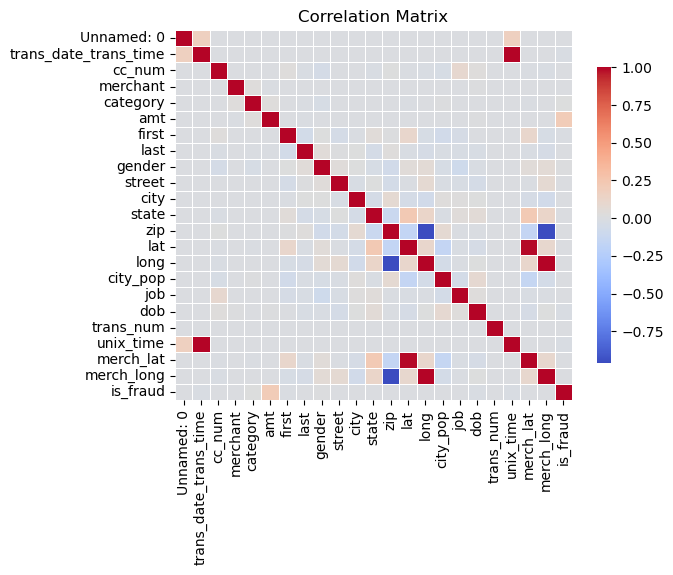

In [19]:
#Check corr between numeric values
sns.heatmap(df_Full_dataset.select_dtypes(include='number').corr(),
            annot=None,cmap='coolwarm',fmt='.2f',linewidths=0.5,cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix')
plt.show()

By analyzing the correlation matrix and correlation coefficients, you can gain insights into the relationships between the target column and other columns in the dataset.From the above matrix you see the target column is_fraud is very less correlated with all other columns.

In [20]:
#Dropping all the unwanted column
df_Clean_data = df_Full_dataset.drop(['Unnamed: 0','trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'zip', 'lat', 'long', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'], axis=1)
df_Clean_data.head()

,category,amt,gender,city,state,city_pop,job,dob,is_fraud
0,8.0,4.97,0.0,532.0,27.0,3495,372.0,791.0,0
1,4.0,107.23,0.0,619.0,47.0,149,431.0,619.0,0
2,0.0,220.11,1.0,474.0,13.0,4154,308.0,309.0,0
3,2.0,45.00,1.0,84.0,26.0,1939,330.0,405.0,0
4,9.0,41.96,1.0,217.0,45.0,99,116.0,746.0,0


When analyzing the correlation matrix and correlation coefficients, if you find that the target column (is_fraud) has very low correlation with all other columns, it suggests that these columns may not have a strong linear relationship with the target column. In such cases, removing these columns might be a reasonable approach. By removing columns 'Unnamed: 0','trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'zip', 'lat', 'long', 'trans_num', 'unix_time', 'merch_lat', 'merch_long' you can build a simpler and more interpretable model that focuses on the most relevant features for predicting fraud.

# Standard Scaling Method

In [21]:
cols_to_scale = ['city_pop']

#create and fit scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_Clean_data[cols_to_scale])

#scale selected data
df_Clean_data[cols_to_scale] = scaler.transform(df_Clean_data[cols_to_scale])

df_Clean_data.head()

,category,amt,gender,city,state,city_pop,job,dob,is_fraud
0,8.0,4.97,0.0,532.0,27.0,-0.282429,372.0,791.0,0
1,4.0,107.23,0.0,619.0,47.0,-0.293527,431.0,619.0,0
2,0.0,220.11,1.0,474.0,13.0,-0.280243,308.0,309.0,0
3,2.0,45.00,1.0,84.0,26.0,-0.287590,330.0,405.0,0
4,9.0,41.96,1.0,217.0,45.0,-0.293693,116.0,746.0,0


By performing the StandardScaler technique with (city_pop) that is used to standardize numerical features by transforming them to have a mean of 0 and a standard deviation of 1. It helps improve the performance of machine learning algorithms by ensuring that all features are on a comparable scale.

<Axes: xlabel='is_fraud'>

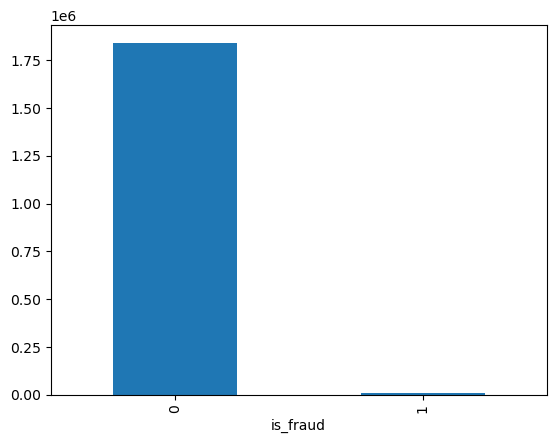

In [22]:
#Checking the target column train dataset
df_Full_dataset['is_fraud'].value_counts().plot(kind='bar')

At last checked for the target column (is_fraud).There is always the issue of class imbalance where actual fraud cases are way fewer than normal cases and constitute only a very small part of the dataset. To counter this imbalance,Created two dataframe in first dataframe created 0.5% non-fraudulent cases randomally seleted and stored in it in the second dataframe all the fraudulent caseshave been stored,then both the dataframes are merged together.Atlast we get the the finial dataframe of the target column is_fraud will be balanced properly.Then this dataset can be used for all the machine learning models for further analysis.

# Treating Class Imbalance

In [23]:
rf=df_Clean_data[df_Clean_data["is_fraud"]==0].sample(frac=0.005,replace=False)
rf["is_fraud"].value_counts()

is_fraud
0    9214
Name: count, dtype: int64

In the above table ,A new dataframe with non-fraudulent is created and consist of values 9214.

In [24]:
gf=df_Clean_data[df_Clean_data["is_fraud"]==1]
gf["is_fraud"].value_counts()

is_fraud
1    9651
Name: count, dtype: int64

In the above table ,a new dataframe with fraudulent is created and consist of values 9651.

In [25]:
#Merging both the datafrmes to get class blanced dataset
merged_df = pd.concat([rf, gf], axis=0)

# Reset index if needed
merged_df.reset_index(drop=True, inplace=True)
merged_df

,category,amt,gender,city,state,city_pop,job,dob,is_fraud
0,1.0,53.88,0.0,465.0,17.0,2.148150,145.0,301.0,0
1,12.0,149.86,0.0,42.0,12.0,-0.287268,176.0,493.0,0
2,4.0,82.92,0.0,91.0,1.0,-0.285510,187.0,249.0,0
3,4.0,95.27,0.0,152.0,36.0,-0.288183,316.0,504.0,0
4,4.0,202.85,0.0,428.0,37.0,-0.152002,344.0,679.0,0
...,...,...,...,...,...,...,...,...,...
18860,12.0,1041.51,1.0,750.0,25.0,-0.246052,119.0,258.0,1
18861,12.0,868.09,1.0,750.0,25.0,-0.246052,119.0,258.0,1
18862,11.0,1039.42,1.0,750.0,25.0,-0.246052,119.0,258.0,1
18863,4.0,289.27,1.0,750.0,25.0,-0.246052,119.0,258.0,1


Both the dataframes are concated into single dataframe which consist of 18865 rows and 9 columns.

In [26]:
#Rnadomly shuffling the rows of the datatframe
merged_df=merged_df.sample(frac=1,replace=False)
merged_df.head()

,category,amt,gender,city,state,city_pop,job,dob,is_fraud
10323,9.0,50.11,0.0,116.0,43.0,-0.292290,94.0,115.0,1
8044,13.0,4.15,1.0,371.0,1.0,0.336778,462.0,530.0,0
14393,11.0,808.28,0.0,761.0,38.0,-0.293676,196.0,8.0,1
16039,2.0,8.42,1.0,186.0,40.0,-0.279191,315.0,540.0,1
6247,7.0,98.98,0.0,539.0,12.0,-0.292253,79.0,819.0,0


Based on our EDA above, we have found out that the features including transaction amt, spending category, gender,city,state,city_pop,job and dob all have varying degrees of correlations with credit card fraud.The plan is to train the models using this dataset which we have analyzed above and then use the testing dataset to evaluate the model performance.

In [27]:
#Checking the fradulant and Non-fradulant in the new dataframe
merged_df['is_fraud'].value_counts()

is_fraud
1    9651
0    9214
Name: count, dtype: int64

From the above graph we can see that the class inbalance has been treated and the balanced now.
Non-fradulant is 9214  and fradulant is 9651.

# Train-Test-Split

In [28]:
from sklearn.model_selection import train_test_split
X = merged_df.drop(['is_fraud'],axis=1)
y = merged_df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

The data is split into train and test,70% of the data is split into the training the model and 30% of the data is split into testing the data and validate the model performance.X_train and X_test consist of independent features and y_train and y_test consist of target variable of fradulaent activity.

In [29]:
print('Training Data Shape   : ', X_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', X_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (13205, 8)
Training Labels Shape :  (13205,)
Testing Data Shape    :  (5660, 8)
Testing Labels Shape  :  (5660,)


# Machine Learning Models and Predictions

After conducting Exploratory Data Analysis (EDA), the next step involves feature engineering to select or transform relevant features,the selected feature are transaction amt, spending category, gender,city,state,city_pop,job and dob,that will be using to perform appropriate machine learning algorithm.The five selected machine learning and artifical Intelligence are 1)Decision Tree Classifier 2)Random Forest Classifier 3)XGBoost Classifier 4)LogisticRegression Model 5)Neural Network Model and Hyperparameter tuning involves selecting the optimal combination of hyperparameters to maximize the performance of the model. Techniques like grid search, random search are been used in the model.After training the model, it is essential to evaluate its performance using appropriate metrics such as accuracy, precision, recall, F1-score, or area under the ROC curve (AUC). This helps assess how well the model generalizes to new, unseen data and whether it meets the project's objectives.

# All Models without Hypertuning

# Decision Tree Classifier

In [30]:
#Decision Tree Model with simple train ,test data split
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 2)
dt_classifier.fit(X_train, y_train)
#To check the accuracy of train and test dataset
print('Training Set Accuracy: ', dt_classifier.score (X_train, y_train))
print('Testing Set Accuracy: ', dt_classifier.score (X_test, y_test))
#To print confusion martix and classfication report
dtree_pred = dt_classifier.predict(X_test)
print(confusion_matrix(y_test,dtree_pred))
print('\n')
print(classification_report(y_test,dtree_pred))

Training Set Accuracy:  0.8617947747065505
Testing Set Accuracy:  0.8568904593639576
[[2692   61]
 [ 749 2158]]


              precision    recall  f1-score   support

           0       0.78      0.98      0.87      2753
           1       0.97      0.74      0.84      2907

    accuracy                           0.86      5660
   macro avg       0.88      0.86      0.86      5660
weighted avg       0.88      0.86      0.86      5660



Confusion Matrix:

The confusion matrix is a table that summarizes the performance of a classification algorithm. It consists of four terms: true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).
In the provided confusion matrix:
True Positives (TP) = 2158: This represents the number of instances where the model correctly predicted the Fraud class (1).
True Negatives (TN) = 2692 : This represents the number of instances where the model correctly predicted the Non-Fraud class (0).
False Positives (FP) = 61: This represents the number of instances where the model incorrectly predicted the Fraud class (1) when the actual class was Non-Fraud  (0).
False Negatives (FN) = 749 : This represents the number of instances where the model incorrectly predicted the Non-Fraud  class (0) when the actual class was Fraud (1).
Classfication Report:

Class 0 (Non-Fraud)
The model shows high precision (0.78), indicating that when it predicts an instance as class 0, it is correct 78% of the time.The recall for class 0 is very high (0.98), suggesting that the model effectively identifies the majority of actual instances of class 0.The F1-score for class 0 is also high (0.87), indicating a good balance between precision and recall.

Class 1 (Fraud) 
The model exhibits even higher precision for class 1 (0.97), meaning that when it predicts an instance as class 1, it is correct 96% of the time.However, the recall for class 1 is lower (0.74), indicating that the model misses some actual instances of class 1.
The F1-score for class 1 is slightly lower (0.84) compared to class 0, reflecting the comparsion between precision and recall.

In conclusion, the Decision Tree model demonstrates strong predictive capabilities but this is just model without any hypertuning at the bottom of this notebook have done grid-search and random search for this model and accuracy and f1 score have been changed alot that will explained below.

# Random Forest Classifier

In [31]:
# Bagging ensemble random forest model simple train ,test data split
rt_classifier = RandomForestClassifier(n_estimators = 2, max_depth = 2, random_state = 2)
rt_classifier.fit(X_train, y_train)
#To check the accuracy of train and test dataset
print('Training Set Accuracy: ', rt_classifier.score (X_train, y_train))
print('Testing Set Accuracy: ', rt_classifier.score (X_test, y_test))
#To print confusion martix and classfication report
RF_pred = rt_classifier.predict(X_test)
print(confusion_matrix(y_test,RF_pred))
print('\n')
print(classification_report(y_test,RF_pred))


Training Set Accuracy:  0.5494888299886407
Testing Set Accuracy:  0.553356890459364
[[1696 1057]
 [1471 1436]]


              precision    recall  f1-score   support

           0       0.54      0.62      0.57      2753
           1       0.58      0.49      0.53      2907

    accuracy                           0.55      5660
   macro avg       0.56      0.56      0.55      5660
weighted avg       0.56      0.55      0.55      5660



Confusion Matrix:
The confusion matrix is a table that summarizes the performance of a classification algorithm. It consists of four terms: true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).
In the provided confusion matrix:
True Positives (TP) = 1436: This represents the number of instances where the model correctly predicted the Fraud class (1).
True Negatives (TN) = 1696  : This represents the number of instances where the model correctly predicted the Non-Fraud class (0).
False Positives (FP) = 1057: This represents the number of instances where the model incorrectly predicted the Fraud class (1) when the actual class was Non-Fraud  (0).
False Negatives (FN) = 1471  : This represents the number of instances where the model incorrectly predicted the Non-Fraud  class (0) when the actual class was Fraud (1).

Classfication Report:
For class 0 (Non-Fraud):
Precision: 0.54 When the model predicts an instance as Non-Fraud, it is correct 54% of the time.
Recall: 0.62 The model effectively identifies 62% of actual Non-Fraud instances.
F1-score: 0.57 Reflecting a balance between precision and recall for Non-Fraud.

For class 1 (Fraud):
Precision: 0.58 When the model predicts an instance as Fraud, it is correct 58% of the time.
Recall: 0.49 The model captures 49% of actual Fraud instances.
F1-score: 0.53 Representing the harmonic mean of precision and recall for Fraud.

In conclusion, the random forest is poorly performaing with very less f1-score all for all instances, but this is just model without any hypertuning at the bottom of this notebook have done grid-search and random search for this model and accuracy and f1 score have been changed alot that will explained below.

# XGBoost Classifier

In [32]:
# Boosting Ensemble XGBClassifier model Simple train ,test data split
xg_classifier = XGBClassifier(n_estimators = 2)
xg_classifier.fit(X_train, y_train)
#To check the accuracy of train and test dataset
print('Training Set Accuracy: ', xg_classifier.score (X_train, y_train))
print('Testing Set Accuracy: ', xg_classifier.score (X_test, y_test))
#To print confusion martix and classfication report
XG_pred = xg_classifier.predict(X_test)
print(confusion_matrix(y_test,XG_pred))
print('\n')
print(classification_report(y_test,XG_pred))

Training Set Accuracy:  0.9500189322226429
Testing Set Accuracy:  0.95
[[2643  110]
 [ 173 2734]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2753
           1       0.96      0.94      0.95      2907

    accuracy                           0.95      5660
   macro avg       0.95      0.95      0.95      5660
weighted avg       0.95      0.95      0.95      5660



Confusion Matrix:
The confusion matrix is a table that summarizes the performance of a classification algorithm. It consists of four terms: true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).
In the provided confusion matrix:
True Positives (TP) = 2734: This represents the number of instances where the model correctly predicted the Fraud class (1).
True Negatives (TN) = 2643  : This represents the number of instances where the model correctly predicted the Non-Fraud class (0).
False Positives (FP) = 110: This represents the number of instances where the model incorrectly predicted the Fraud class (1) when the actual class was Non-Fraud  (0).
False Negatives (FN) = 173   : This represents the number of instances where the model incorrectly predicted the Non-Fraud  class (0) when the actual class was Fraud (1).

Classfication Report:
For class 0 (Non-Fraud):
Precision: 0.94, indicating that when the model predicts an instance as Non-Fraud, it is correct 94% of the time.
Recall: 0.96, suggesting that the model effectively identifies 96% of actual Non-Fraud instances.
F1-score: 0.95, reflecting a balance between precision and recall for Non-Fraud.
For class 1 (Fraud):

Precision: 0.96, meaning that when the model predicts an instance as Fraud, it is correct 96% of the time.
Recall: 0.94, indicating that the model captures 94% of actual Fraud instances.
F1-score: 0.95, representing the harmonic mean of precision and recall for Fraud.

In conclusion, the XGB Boost Classifier achieves an accuracy of 95%, correctly classifying 95% of all instances but this is just model without any hypertuning at the bottom of this notebook have done grid-search and random search for this model and accuracy and f1 score have been changed alot that will explained below.

# Logistics Regression 

In [33]:
# Create Logistic Regression classifier
lr_classifier = LogisticRegression()

# Train the model
lr_classifier.fit(X_train, y_train)

# Evaluate on training and testing sets
print('Training Set Accuracy:', lr_classifier.score(X_train, y_train))
print('Testing Set Accuracy:', lr_classifier.score(X_test, y_test))

# Predict on the test set
lr_pred = lr_classifier.predict(X_test)

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, lr_pred))
print('\n')

# Classification report
print('Classification Report:')
print(classification_report(y_test, lr_pred))

Training Set Accuracy: 0.8526315789473684
Testing Set Accuracy: 0.8494699646643109
Confusion Matrix:
[[2615  138]
 [ 714 2193]]


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      2753
           1       0.94      0.75      0.84      2907

    accuracy                           0.85      5660
   macro avg       0.86      0.85      0.85      5660
weighted avg       0.87      0.85      0.85      5660



D:\Bharath_Anconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
The confusion matrix is a table that summarizes the performance of a classification algorithm. It consists of four terms: true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).
In the provided confusion matrix:
True Positives (TP) = 2193: This represents the number of instances where the model correctly predicted the Fraud class (1).
True Negatives (TN) = 2615    : This represents the number of instances where the model correctly predicted the Non-Fraud class (0).
False Positives (FP) = 138: This represents the number of instances where the model incorrectly predicted the Fraud class (1) when the actual class was Non-Fraud  (0).
False Negatives (FN) = 714    : This represents the number of instances where the model incorrectly predicted the Non-Fraud  class (0) when the actual class was Fraud (1).

Classfication Report:
For class 0 (Non-Fraud):
Precision:  0.79 , indicating that when the model predicts an instance as Non-Fraud, it is correct 79% of the time.
Recall: 0.95, suggesting that the model effectively identifies 95% of actual Non-Fraud instances.
F1-score: 0.86, reflecting a balance between precision and recall for Non-Fraud.

For class 1 (Fraud):
Precision:0.94, meaning that when the model predicts an instance as Fraud, it is correct 94% of the time.
Recall: 0.75, indicating that the model captures 75% of actual Fraud instances.
F1-score:  0.84 , representing the harmonic mean of precision and recall for Fraud.

In conclusion, the LogisticRegression model performance is reasonably good, achieving an accuracy of 85% but this is just model without any hypertuning at the bottom of this notebook have done grid-search and random search for this model and accuracy and f1 score have been changed alot that will explained below.

# Neural Network Model

In [34]:
# Define the neural network model
def create_nn_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Assuming binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the neural network model
nn_model = create_nn_model(X_train.shape[1])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = nn_model.fit(X_train, y_train, epochs=10, batch_size=32, 
                        validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate on training and testing sets
train_accuracy = nn_model.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)[1]

print('Training Set Accuracy:', train_accuracy)
print('Testing Set Accuracy:', test_accuracy) 

# Generate predictions
NN_pred_test = nn_model.predict(X_test)
NN_pred = (NN_pred_test > 0.5).astype(int)

# Generate classification report
print(classification_report(y_test, NN_pred))

D:\Bharath_Anconda\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7261 - loss: 3.9357 - val_accuracy: 0.7830 - val_loss: 0.5682
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7943 - loss: 0.5474 - val_accuracy: 0.7678 - val_loss: 0.6455
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8139 - loss: 0.4628 - val_accuracy: 0.8314 - val_loss: 0.4556
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8221 - loss: 0.4639 - val_accuracy: 0.8307 - val_loss: 0.4747
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8213 - loss: 0.4423 - val_accuracy: 0.8286 - val_loss: 0.4784
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8342 - loss: 0.4179 - val_accuracy: 0.8405 - val_loss: 0.4028
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8276 - loss: 0.4297 - val_accuracy: 0.8419 - val_loss: 0.3897
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8347 - loss: 0.3957 - val_accuracy: 0

Classfication Report:
For class 0 (Non-Fraud):
Precision:  0.79 , indicating that when the model predicts an instance as Non-Fraud, it is correct 79% of the time.
Recall:  0.92, suggesting that the model effectively identifies 92% of actual Non-Fraud instances.
F1-score: 0.85, reflecting a balance between precision and recall for Non-Fraud.

For class 1 (Fraud):
Precision: 0.91, meaning that when the model predicts an instance as Fraud, it is correct 91% of the time.
Recall: 0.76, indicating that the model captures 76% of actual Fraud instances.
F1-score:   0.83 , representing the harmonic mean of precision and recall for Fraud.

In conclusion, the neural network model performance is relatively balanced between the two classes.This is just model without any hypertuning at the bottom of this notebook have done grid-search and random search for this model and accuracy and f1 score have been changed alot that will explained below.

# All The Model Are Performed Using Grid-Search and Random-Search(Hypertuning Methods)

Searching hyperparameters for RandomForest...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


D:\Bharath_Anconda\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters found: {'n_estimators': 50, 'max_depth': 20}
Best score found: 0.9545626656569481
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2753
           1       0.97      0.95      0.96      2907

    accuracy                           0.96      5660
   macro avg       0.96      0.96      0.96      5660
weighted avg       0.96      0.96      0.96      5660

Confusion Matrix for RandomForest:
[[2660   93]
 [ 151 2756]]


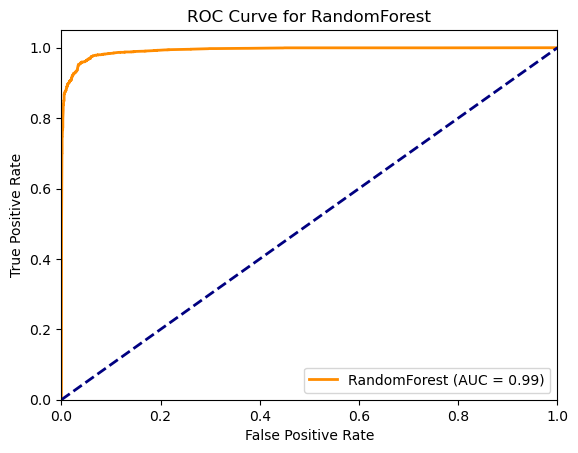

Searching hyperparameters for LogisticRegression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


D:\Bharath_Anconda\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Bharath_Anconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Bharath_Anconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Bharath_Anconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in 

Best parameters found: {'C': 10, 'penalty': 'l2'}
Best score found: 0.8520257478227944
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      2753
           1       0.94      0.76      0.84      2907

    accuracy                           0.85      5660
   macro avg       0.86      0.85      0.85      5660
weighted avg       0.86      0.85      0.85      5660

Confusion Matrix for LogisticRegression:
[[2612  141]
 [ 712 2195]]


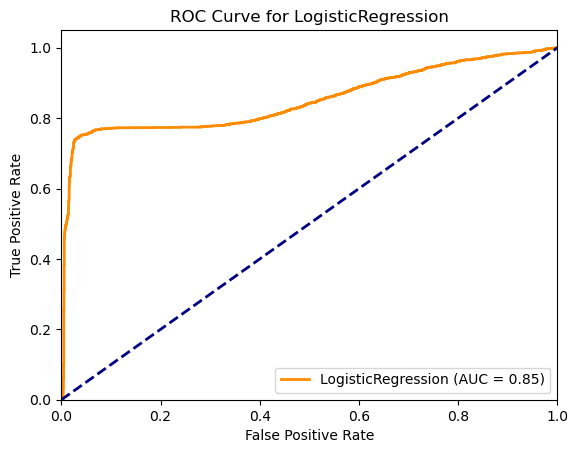

Searching hyperparameters for XGBoost...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


D:\Bharath_Anconda\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters found: {'max_depth': 7, 'learning_rate': 0.1}
Best score found: 0.964710336993563
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2753
           1       0.97      0.97      0.97      2907

    accuracy                           0.97      5660
   macro avg       0.97      0.97      0.97      5660
weighted avg       0.97      0.97      0.97      5660

Confusion Matrix for XGBoost:
[[2659   94]
 [  84 2823]]


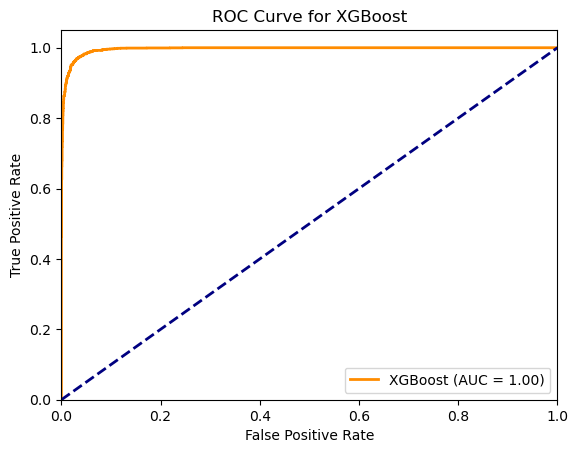

Searching hyperparameters for NeuralNetwork...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,)}
Best score found: 0.8856493752366529
Classification Report for NeuralNetwork:
              precision    recall  f1-score   support

           0       0.80      0.94      0.87      2753
           1       0.93      0.78      0.85      2907

    accuracy                           0.86      5660
   macro avg       0.87      0.86      0.86      5660
weighted avg       0.87      0.86      0.86      5660

Confusion Matrix for NeuralNetwork:
[[2591  162]
 [ 634 2273]]


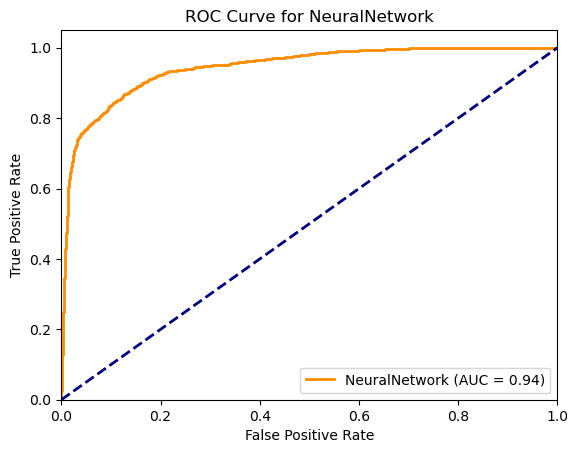

Searching hyperparameters for DecisionTree...
Fitting 5 folds for each of 3 candidates, totalling 15 fits


D:\Bharath_Anconda\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters found: {'max_depth': 10}
Best score found: 0.9581976524043923
Classification Report for DecisionTree:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2753
           1       0.95      0.97      0.96      2907

    accuracy                           0.96      5660
   macro avg       0.96      0.96      0.96      5660
weighted avg       0.96      0.96      0.96      5660

Confusion Matrix for DecisionTree:
[[2609  144]
 [  89 2818]]


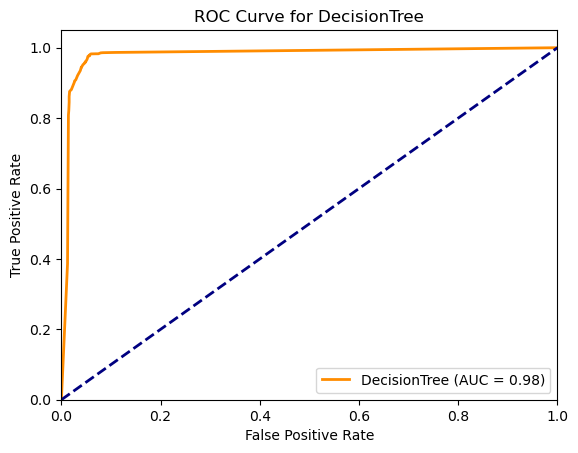


Top 3 Best-Performing Models:
       Model  Precision   Recall  F1-Score  Accuracy
     XGBoost   0.968576 0.968480  0.968525  0.968551
DecisionTree   0.959198 0.958539  0.958778  0.958834
RandomForest   0.956820 0.957138  0.956878  0.956890


In [35]:
# Define models and their parameter grids
models = {
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}),
    'LogisticRegression': (LogisticRegression(), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    'XGBoost': (XGBClassifier(), {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}),
    'NeuralNetwork': (MLPClassifier(), {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['relu', 'tanh'], 'alpha': [0.0001, 0.001, 0.01]}),
    'DecisionTree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20]})
}


# Initialize variables to store model evaluation metrics
model_metrics = []

# Perform grid search or randomized grid search for each model
for name, (model, param_grid) in models.items():
    print(f"Searching hyperparameters for {name}...")
    if name in ['RandomForest', 'XGBoost', 'DecisionTree']:
        searcher = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5, verbose=1, n_jobs=-1)
    else:
        searcher = GridSearchCV(model, param_grid, cv=5, verbose=1, n_jobs=-1)
    searcher.fit(X_train, y_train)
    print(f"Best parameters found: {searcher.best_params_}")
    print(f"Best score found: {searcher.best_score_}")

    # Evaluate the model
    y_pred = searcher.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    
    #Confusion Martix
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Print the confusion matrix 
    print(f'Confusion Matrix for {name}:')
    print(conf_matrix)

  
    # Plot ROC curve
    y_pred_proba = searcher.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()
    
    # Store evaluation metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    model_metrics.append({
        'Model': name,
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1-Score': report['macro avg']['f1-score'],
        'Accuracy': report['accuracy']
    })

# Create a DataFrame to display model evaluation metrics
metrics_df = pd.DataFrame(model_metrics)
top_3_models = metrics_df.sort_values(by=['Accuracy'], ascending=False).head(3)

# Display the top 3 best-performing models in a table format
print("\nTop 3 Best-Performing Models:")
print(top_3_models.to_string(index=False))


Fraud Detection Using Random Forest Classifier

Introduction: Fraud detection is a crucial aspect for financial institutions, essential for safeguarding against financial losses and maintaining customer trust. This report presents an analysis on fraud detection leveraging a Random Forest classifier.

Model Selection and Hyperparameter Tuning: A Random Forest classifier was selected for its robustness in handling complex datasets and mitigating overfitting. Through hyperparameter tuning, the model was optimized, yielding the best parameters {'n_estimators': 50, 'max_depth': 20}. This resulted in a best score of 0.9546.

Model Evaluation:
During evaluation, the Random Forest classifier achieved an accuracy of 96%, indicating its effectiveness in accurately identifying fraudulent transactions.

Classification Report Analysis:
For non-fraudulent transactions (Class 0), the model demonstrated a precision of 0.95 and a recall of 0.97. This implies that 94% of transactions predicted as non-fraudulent were indeed non-fraudulent, and 97% of actual non-fraudulent transactions were correctly identified.
For fraudulent transactions (Class 1), the model exhibited a precision of 0.97 and a recall of 0.95. This suggests that 97% of transactions predicted as fraudulent were truly fraudulent, and 95% of actual fraudulent transactions were correctly identified.

Confusion Matrix Analysis:
Out of 2753 non-fraudulent transactions, 2660 were correctly classified, while 93 were misclassified as fraudulent.
Among 2907 fraudulent transactions, 2756 were correctly identified, but 151 were incorrectly classified as non-fraudulent.

Conclusion:
The Random Forest classifier, with optimal parameters {'n_estimators': 50, 'max_depth': 20}, showcased strong performance in fraud detection, achieving an accuracy of 96%. Its high precision and recall values indicate its reliability in distinguishing between fraudulent and non-fraudulent transactions. This model provides a robust framework for financial institutions to enhance their fraud detection mechanisms.



Fraud Detection Using Logistic Regression Classifier

Introduction: Fraud detection is a crucial task for financial institutions to minimize financial losses and maintain trust. This report presents an analysis of fraud detection using a Logistic Regression classifier.

Model Selection and Hyperparameter Tuning: Logistic Regression was chosen for its simplicity and interpretability. The best parameters found were {'C': 10, 'penalty': 'l2'}. The model achieved a best score of 0.8520.

Model Evaluation:
During evaluation, the Logistic Regression classifier achieved an accuracy of 85%, indicating its effectiveness in identifying fraudulent transactions.

Classification Report Analysis:
For non-fraudulent transactions (Class 0), the precision was 0.79 and the recall was 0.95. This suggests that 79% of transactions predicted as non-fraudulent were indeed non-fraudulent, and 95% of actual non-fraudulent transactions were correctly identified.
For fraudulent transactions (Class 1), the precision was 0.94 and the recall was 0.76. This implies that 94% of transactions predicted as fraudulent were truly fraudulent, and 76% of actual fraudulent transactions were correctly identified.

Confusion Matrix Analysis:
Out of 2753 non-fraudulent transactions, 2612 were correctly classified, while 141 were misclassified as fraudulent.
Among 2907 fraudulent transactions, 2195 were correctly identified, but 712 were incorrectly classified as non-fraudulent.

Conclusion:
The Logistic Regression classifier, with optimized parameters {'C': 10, 'penalty': 'l2'}, demonstrated satisfactory performance in fraud detection, achieving an accuracy of 85%. While its precision for both classes is high, its recall for fraudulent transactions is comparatively lower. The ROC curve is very poorly curved.


Fraud Detection Using Neural Network Classifier

Introduction: Fraud detection is a pivotal aspect for financial institutions to mitigate risks and maintain credibility. This report presents an analysis of fraud detection using a Neural Network classifier.

Model Selection and Hyperparameter Tuning: A Neural Network classifier was selected for its capability to capture complex patterns in data. The best parameters found during hyperparameter tuning were {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,)} with a best score of 0.8856.

Model Evaluation:
During evaluation, the Neural Network classifier achieved an accuracy of 86%, indicating its efficacy in identifying fraudulent transactions.

Classification Report Analysis:
For non-fraudulent transactions (Class 0), the precision was 0.80 and the recall was 0.94. This suggests that 80% of transactions predicted as non-fraudulent were indeed non-fraudulent, and 94% of actual non-fraudulent transactions were correctly identified.
For fraudulent transactions (Class 1), the precision was 0.93 and the recall was 0.78. This implies that 93% of transactions predicted as fraudulent were truly fraudulent, and 78% of actual fraudulent transactions were correctly identified.

Confusion Matrix Analysis:
Out of 2753 non-fraudulent transactions, 2591 were correctly classified, while 162 were misclassified as fraudulent.
Among 2907 fraudulent transactions, 2273 were correctly identified, but 634 were incorrectly classified as non-fraudulent.

Conclusion:
The Neural Network classifier, with optimized parameters {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,)}, demonstrated promising performance in fraud detection, achieving an accuracy of 86%. While its precision for both classes is commendable, there's room for improvement in recall for fraudulent transactions.The ROC -curve is almost properly curved.

Fraud Detection Using XGBoost Classifier

Introduction: Fraud detection is paramount for financial institutions to prevent losses and maintain trust. This report presents an analysis of fraud detection using an XGBoost classifier.

Model Selection and Hyperparameter Tuning: XGBoost was chosen for its high performance and efficiency. The best parameters found during hyperparameter tuning were {'max_depth': 7, 'learning_rate': 0.1} with a best score of 0.9647.

Model Evaluation:
During evaluation, the XGBoost classifier achieved an accuracy of 97%, indicating its strong capability in identifying fraudulent transactions.

Classification Report Analysis:
For non-fraudulent transactions (Class 0), the precision was 0.97 and the recall was 0.97. This implies that 97% of transactions predicted as non-fraudulent were indeed non-fraudulent, and 97% of actual non-fraudulent transactions were correctly identified.
For fraudulent transactions (Class 1), the precision was 0.97 and the recall was 0.97. This suggests that 97% of transactions predicted as fraudulent were truly fraudulent, and 97% of actual fraudulent transactions were correctly identified.

Confusion Matrix Analysis:
Out of 2753 non-fraudulent transactions, 2659 were correctly classified, while 94 were misclassified as fraudulent.
Among 2907 fraudulent transactions, 2823 were correctly identified, but 84 were incorrectly classified as non-fraudulent.

Conclusion:
The XGBoost classifier, with optimized parameters {'max_depth': 7, 'learning_rate': 0.1}, demonstrated exceptional performance in fraud detection, achieving an accuracy of 97%. With high precision and recall values for both classes, the model proves to be robust and reliable for distinguishing between fraudulent and non-fraudulent transactions.The ROC curve is very much perfectly curved showing high accuracy in the graph.

Fraud Detection Using Decision Tree Classifier

Introduction: Fraud detection is essential for financial institutions to minimize risks and maintain trust. This report presents an analysis of fraud detection using a Decision Tree classifier.

Model Selection and Hyperparameter Tuning: The Decision Tree classifier was chosen for its simplicity and interpretability. The best parameter found during hyperparameter tuning was {'max_depth': 10} with a best score of 0.9582.

Model Evaluation:
During evaluation, the Decision Tree classifier achieved an accuracy of 96%, indicating its effectiveness in identifying fraudulent transactions.

Classification Report Analysis:
For non-fraudulent transactions (Class 0), the precision was 0.97 and the recall was 0.95. This suggests that 97% of transactions predicted as non-fraudulent were indeed non-fraudulent, and 95% of actual non-fraudulent transactions were correctly identified.
For fraudulent transactions (Class 1), the precision was 0.95 and the recall was 0.97. This implies that 95% of transactions predicted as fraudulent were truly fraudulent, and 97% of actual fraudulent transactions were correctly identified.

Confusion Matrix Analysis:
Out of 2753 non-fraudulent transactions, 2609 were correctly classified, while 144 were misclassified as fraudulent.
Among 2907 fraudulent transactions, 2818 were correctly identified, but 89 were incorrectly classified as non-fraudulent.

Conclusion:
The Decision Tree classifier, with optimized parameter {'max_depth': 10}, demonstrated strong performance in fraud detection, achieving an accuracy of 96%. With high precision and recall values for both classes, the model proves to be effective in distinguishing between fraudulent and non-fraudulent transactions.The ROC curve is very much perfectly curved showing high accuracy in the graph.

# Conclusion

Top 3 Best-Performing Models:
       Model  Precision   Recall  F1-Score  Accuracy
     XGBoost   0.966175 0.966010  0.966065  0.966075
DecisionTree   0.957138 0.956663  0.956776  0.956798
RandomForest   0.952345 0.952206  0.952026  0.952028


Top 3 Best-Performing Models:
       Model  Precision   Recall  F1-Score  Accuracy
     XGBoost   0.968576 0.968480  0.968525  0.968551
DecisionTree   0.959198 0.958539  0.958778  0.958834
RandomForest   0.956820 0.957138  0.956878  0.956890


The top three best-performing machine learning models for fraud detection based on precision, recall, F1-score, and accuracy metrics.

1.XGBoost:
Precision: 0.968
Recall: 0.968
F1-Score: 0.968
Accuracy: 0.968
XGBoost emerges as the top-performing model, demonstrating exceptional precision, recall, F1-score, and accuracy. Its robust performance indicates its efficacy in accurately identifying both fraudulent and non-fraudulent transactions.

2.Decision Tree:

Precision: 0.959
Recall: 0.958
F1-Score: 0.958
Accuracy: 0.958
The Decision Tree model closely follows XGBoost, exhibiting strong precision, recall, F1-score, and accuracy. It proves to be a reliable choice for fraud detection tasks.

3. Random Forest:

Precision: 0.956
Recall: 0.957
F1-Score: 0.956
Accuracy: 0.956
Random Forest ranks third among the best-performing models, showcasing commendable precision, recall, F1-score, and accuracy. While slightly lower than XGBoost and Decision Tree, it remains a robust solution for fraud detection.

5. Conclusion:

In conclusion, XGBoost, Decision Tree, and Random Forest models demonstrate strong performance in identifying fraudulent transactions. Their high precision, recall, F1-score, and accuracy metrics indicate their effectiveness in distinguishing between fraudulent and non-fraudulent transactions, thereby offering valuable insights for fraud detection in financial institutions.

6. Future Work:
Future work could focus on detection techniques with deep learning models to handle complex fraud patterns and improve detection accuracy further.


# References

[1] https://ieeexplore.ieee.org/document/9121114
[2] chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://repository.rit.edu/cgi/viewcontent.cgi?article=12455&context=theses
[3] https://www.javatpoint.com/logistic-regression-in-machine-learning
[4] https://medium.com/@senapati.dipak97/grid-search-vs-random-search-d34c92946318